In [1]:
import random
import math
import matplotlib.pyplot as plt

# população inicial do problema
itens_disponiveis = [ 
    { 'peso': 3, 'valor': 1},
    { 'peso': 8, 'valor': 3},
    { 'peso': 12, 'valor': 1},
    { 'peso': 2, 'valor': 8},
    { 'peso': 8, 'valor': 9},
    { 'peso': 4, 'valor': 3},
    { 'peso': 4, 'valor': 2},
    { 'peso': 5, 'valor': 8},
    { 'peso': 1, 'valor': 5},
    { 'peso': 1, 'valor': 1},
    { 'peso': 8, 'valor': 1},
    { 'peso': 6, 'valor': 6},
    { 'peso': 4, 'valor': 3},
    { 'peso': 3, 'valor': 2},
    { 'peso': 3, 'valor': 5},
    { 'peso': 5, 'valor': 2},
    { 'peso': 7, 'valor': 3},
    { 'peso': 3, 'valor': 8},
    { 'peso': 5, 'valor': 9},
    { 'peso': 7, 'valor': 3},
    { 'peso': 4, 'valor': 2},
    { 'peso': 3, 'valor': 4},
    { 'peso': 7, 'valor': 5},
    { 'peso': 2, 'valor': 4},
    { 'peso': 3, 'valor': 3},
    { 'peso': 5, 'valor': 1},
    { 'peso': 4, 'valor': 3},
    { 'peso': 3, 'valor': 2},
    { 'peso': 7, 'valor': 14},
    { 'peso': 19, 'valor': 32},
    { 'peso': 20, 'valor': 20},
    { 'peso': 21, 'valor': 19},
    { 'peso': 11, 'valor': 15},
    { 'peso': 24, 'valor': 37},
    { 'peso': 13, 'valor': 18},
    { 'peso': 17, 'valor': 13},
    { 'peso': 18, 'valor': 19},
    { 'peso': 6, 'valor': 10},
    { 'peso': 15, 'valor': 15},
    { 'peso': 25, 'valor': 40},
    { 'peso': 12, 'valor': 17},
    { 'peso': 19, 'valor': 39},
]

def gerar_populacao_inicial(itens_disponiveis, tamanho_populacao):
    num_max_itens = len(itens_disponiveis)
    
    return [ [random.choice([0,1]) for i in range(num_max_itens)] for j in range(tamanho_populacao)] 



def calcular_fitness(populacao):
    fitness = []
    for individuo in populacao:
        itens = get_itens_individuo(individuo)
        f = sum_itens(itens)
        f['individuo'] = list(individuo)
        fitness.append(f)
    
    return fitness
    
def get_itens_individuo(individuo):
    return [item for (index, item) in enumerate(itens_disponiveis) if individuo[index]]

def sum_itens(itens):
    peso = 0
    valor = 0
    for item in itens:
        peso += item['peso']
        valor += item['valor']
    
    return {'peso' : peso, 'valor' : valor}




def selecao_roleta(populacao, fitness):
    p = normalizar_fitness(fitness)
    
    selecionados = []
    for individuo in populacao:
        p_selecao = random.uniform(0, 1)
        
        index_individuo_selecionado = 0
        soma = p[index_individuo_selecionado]['valor']
        while soma < p_selecao:
            index_individuo_selecionado += 1
            soma += p[index_individuo_selecionado]['valor']
        
        selecionados.append(populacao[index_individuo_selecionado])
    
    return selecionados

def normalizar_fitness(fitness):
    total = sum_itens(fitness)
    
    normalizado = []
    for f in fitness:
        normalizado.append({
                'peso': f['peso']/total['peso'],
                'valor': f['valor']/total['valor'],
        })
    
    return normalizado



def crossover(populacao, probabilidade):
    
    populacao_crossover = list(populacao) #copia a população inicial para não deletar
    tamanho_populacao = len(populacao_crossover)
    
    num_individuos_crossover = 0 #numero de individuos que passaram por crossover
    crossovered = [] #população após crossover
    
    while num_individuos_crossover < tamanho_populacao:
        num_individuos_crossover += 2
        
        individuo_1 = select_and_remove(populacao_crossover)
        individuo_2 = select_and_remove(populacao_crossover)
        
        # probabilidade de crossover menor que o limiar
        p_not_crossover = random.uniform(0, 1)
        if probabilidade < p_not_crossover:
            # caso não tenha ocorrido o crossover
            crossovered.append(individuo_1)
            crossovered.append(individuo_2)
            continue
        
        ponto_corte  = random.randrange(len(individuo_1))
        
        filho_1 = list(individuo_1[: ponto_corte ]) + list(individuo_2[ponto_corte : ])
        filho_2 = list(individuo_2[: ponto_corte ]) + list(individuo_1[ponto_corte : ])
        
        crossovered.append(filho_1)
        crossovered.append(filho_2)
    
    return crossovered

def select_and_remove(populacao):
    #index_individuo = random.randrange(len(populacao))
    index_individuo = 0 # seleciona sempre os primeiro
    individuo = populacao[index_individuo]
    
    del populacao[index_individuo]
    
    return individuo



def mutar(populacao, probabilidade):
    
    for (index, individuo) in enumerate(populacao):
        populacao[index] = mutar_individuo(list(individuo), probabilidade)
    
    return populacao


def mutar_individuo(individuo, probabilidade):
    for (index, gene) in enumerate(individuo):
        p_not_mutar = random.uniform(0, 1)
        #não muta
        if(probabilidade < p_not_mutar):
            continue
        
        if individuo[index] == 1:
            individuo[index] = 0
        else:
            individuo[index] = 1
    
    return individuo


def selecionar_sobreviventes(fitness_populacao, tamanho_populacao):
    sobreviventes = sorted(fitness_populacao, key=lambda f: f['valor'], reverse=True)
    
    num_sobreviventes = 0
    selecionados = []
    fitness = []
    while num_sobreviventes < tamanho_populacao:
        selecionados.append(list(sobreviventes[num_sobreviventes]['individuo']))
        fitness.append({
                'peso': sobreviventes[num_sobreviventes]['peso'], 
                'valor' : sobreviventes[num_sobreviventes]['valor']
        })
        num_sobreviventes += 1
    
    return selecionados, fitness



In [2]:
#penalização

def fitness_ajustado(populacao, limite_peso):
    fitness_minimo = 0
  
    fitness_penalizada = []
    for index, individuo in enumerate(populacao):
        
        f_individuo = sum_itens(get_itens_individuo(individuo))
        #adiciona o indice do individuo para auxiliar a seleção da próxima geração
        f_individuo['individuo'] = list(individuo) 
        peso = f_individuo['peso']

        #peso permitido
        if peso <= limite_peso:
            # conta um cálculo de fintess
            fitness_penalizada.append(f_individuo.copy())
            continue
    
        #transforma o fitenss em negativo
#         f_individuo['valor'] = math.log2(f_individuo['valor'])
        f_individuo['valor'] = f_individuo['valor'] % limite_peso
        
        fitness_penalizada.append(f_individuo)
        
        if f_individuo['valor'] > fitness_minimo:
            fitness_minimo = f_individuo['valor']
        
    return fitness_penalizada


In [3]:
#Reparação

def reparar(populacao, limite_peso):
    populacao_reparada = []
    for individuo in populacao:
        individuo_corrigido = list(individuo)
        soma = sum_itens(get_itens_individuo(individuo_corrigido))
        
        while soma['peso'] > limite_peso:
            individuo_corrigido, item_removido = remover_item_individuo(individuo_corrigido)
            soma = sum_itens(get_itens_individuo(individuo_corrigido))

        populacao_reparada.append(individuo_corrigido)
    
    return calcular_fitness(populacao_reparada)

def remover_item_individuo(individuo):
    item = 0
    index_item = 0
    while item != 1:
        index_item = random.randrange(len(individuo))
        item = individuo[index_item]
    
    individuo_corrigido = list(individuo)
    individuo_corrigido[index_item] = 0 #remove item
    
    return individuo_corrigido, item

In [4]:

def teste_ag(Np, num_g, p_crossover, p_mutacao, limite_peso, metodo):

    pais = gerar_populacao_inicial(itens_disponiveis, Np)
    fitness = calcular_fitness(pais)

    geracao = 0

    melhores_individuos = []
    melhores_fitness = []
    while geracao < num_g:

        selecionados_crusamento = selecao_roleta(pais, fitness)

        filhos = crossover(selecionados_crusamento, p_crossover)
        filhos = mutar(filhos, p_mutacao)

#         populacao_penalizada = fitness_ajustado(pais + filhos, limite_peso)
        populacao_penalizada = metodo(pais + filhos, limite_peso)
        pais, fitness = selecionar_sobreviventes(populacao_penalizada, Np)
        
        melhores_fitness.append(fitness[0])
        melhores_individuos.append(pais[0])
        
        geracao += 1
        
    return melhores_individuos, melhores_fitness


Plotando
216
FIM


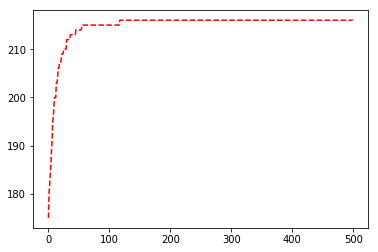

In [12]:
Np = 50
num_g = 500
probabilidade_crossover = 0.9
probabilidade_mutacao = 0.05
limite_peso = 120


file_name = 'saida_pen_pop_' + str(Np) + '_nge_' + str(num_g) 
file_name = file_name + '_pcr_' + str(probabilidade_crossover) + '_pmu_' + str(probabilidade_mutacao)
file_name = file_name + '.txt'

f = open(file_name, 'a+')

f.write('Tamanho População (Np): %d \n' %(Np))
f.write('Máximo gerações: %d \n' %(num_g))
f.write('P. Crossover (Pc): %f \n' %(probabilidade_crossover))
f.write('P. Mutação (Pm): %f \n' %(probabilidade_mutacao))

melhor_valor = 0
itens_melhor = ''
media_melhores = []

execucoes = []
for i in range(10):
    
    execucao = teste_ag(Np,num_g, probabilidade_crossover, probabilidade_mutacao, limite_peso, metodo=ajustar_fitness)
    execucoes.append(execucao)
    
    for index, item in enumerate(execucao[1]):
        total = sum_itens(get_itens_individuo(execucao[0][index]))
        total['num_itens'] = sum(execucao[0][index])
        itens_mochila = ', '.join(map(str, execucao[0][index]))
        
        f.write('< %d, %f, %f, %s > \n' %(total['num_itens'], total['peso'], total['valor'], itens_mochila))
        
        if total['valor'] > melhor_valor: 
            melhor_valor = total['valor']
            itens_melhor = itens_mochila
            
        try:
            soma = media_melhores[index]
        except:
            soma = 0
            media_melhores.append(0)
        
        soma += item['valor']/10 #adiciona na media
        media_melhores[index] = soma
        
print('Plotando')
valores_penalizados = []
indices = []
for index, m in enumerate(media_melhores):

    valores_penalizados.append(round(m))
    indices.append(index)

plt.plot(indices, valores_penalizados, 'r--')


print(valores_penalizados[-1])

print('FIM')



In [6]:

def run_test(Np,num_g, probabilidade_crossover, probabilidade_mutacao, limite_peso, metodo):
    if metodo == 'penalizar':
        file_name = './saida/saida_pen_pop_'
        func = fitness_ajustado
    else:
        file_name = './saida/saida_rep_pop_'
        func = reparar

    file_name = file_name + str(Np) + '_nge_' + str(num_g) 
    file_name = file_name + '_pcr_' + str(probabilidade_crossover) + '_pmu_' + str(probabilidade_mutacao)
    file_name = file_name + '.txt'

    f = open(file_name, 'a+')
    
    f.write('Metodo: %s \n' %(metodo))
    f.write('Tamanho População (Np): %d \n' %(Np))
    f.write('Máximo gerações: %d \n' %(num_g))
    f.write('P. Crossover (Pc): %f \n' %(probabilidade_crossover))
    f.write('P. Mutação (Pm): %f \n' %(probabilidade_mutacao))

    melhor_valor = 0
    itens_melhor = ''
    media_melhores = []

    execucoes = []
    for i in range(10):

        execucao = teste_ag(Np,num_g, probabilidade_crossover, probabilidade_mutacao, limite_peso, metodo=func)
        execucoes.append(execucao)

        for index, item in enumerate(execucao[1]):
            total = sum_itens(get_itens_individuo(execucao[0][index]))
            total['num_itens'] = sum(execucao[0][index])
            itens_mochila = ', '.join(map(str, execucao[0][index]))

            f.write('< %d, %f, %f, %s > \n' %(total['num_itens'], total['peso'], total['valor'], itens_mochila))

            if total['valor'] > melhor_valor: 
                melhor_valor = total['valor']
                itens_melhor = itens_mochila

            try:
                soma = media_melhores[index]
            except:
                soma = 0
                media_melhores.append(0)

            soma += item['valor']/10 #adiciona na media
            media_melhores[index] = soma
        
    return execucao, media_melhores

Iniciando testes
Iniciando Penalização
Iniciando Reparação
Melhor penalização:  212
Melhor reparação:  216
Plotando
212
FIM


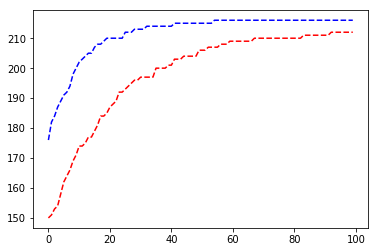

In [12]:

Np = 100
num_g = 100
probabilidade_crossover = 0.8
probabilidade_mutacao = 0.05
limite_peso = 120

print('Iniciando testes')
print('Iniciando Penalização')
_, melhores_penalizacao = run_test(Np,num_g, probabilidade_crossover, probabilidade_mutacao, limite_peso, 'penalizar')

print('Iniciando Reparação')
_, melhores_reparacao = run_test(Np,num_g, probabilidade_crossover, probabilidade_mutacao, limite_peso, 'reparar')

print('Melhor penalização: ', round(melhores_penalizacao[-1]))
print('Melhor reparação: ', round(melhores_reparacao[-1]))

print('Plotando')
        
valores_penalizados = []
valore_reparados = []
indices = []
for index, m in enumerate(zip(melhores_penalizacao, melhores_reparacao)):

    valores_penalizados.append(round(m[0]))
    valore_reparados.append(round(m[1]))
    
    indices.append(index)

plt.plot(indices, valores_penalizados, 'r--', indices, valore_reparados, 'b--')


print(valores_penalizados[-1])

print('FIM')
